# Week 2 - NLP and Deep Learning

---

# Lecture 3: Annotation and POS tagging

This assignment consists of 2 parts: first you annotate the data, then you compare your annotations against the annotations of another annotator. The annotation from the other annotator will be made available at 15:00 on 05-02-2024.

## 1. Annotation 

Find the file with your ITU username in `assignments/week2/pos-data/`. In this file, you will find 20
sentences which are pre-tokenized and in conll format. Behind each word you are supposed to annotate the pos tag, with one tab in between. The final file should look like this:

```
Seriously	ADV
:	PUNCT
do	AUX
not	PART
waste	VERB
your	PRON
time	NOUN
.	PUNCT

```

You should use a tab between the word and its tag. Please check with the script posCheck.py
whether the file format is correct. Usage: `python3 check-pos.py origFile annotatedFile`
For annotation guidelines we refer to the slides and https://universaldependencies.org/u/pos/all.html. Alternatively, it might be helpful to look at example annotations, which are provided in:
`assignments/week2/pos-data/ewt.train.txt`

### Annotation tool
If you prefer to work with an annotation tool instead of text files directly, you can use an annotation tool. You have to make sure to upload the data to LearnIt in the format described above though. I would recommend [Eevee](https://axelsorensen.github.io/EeveeTest/) because it is easy to set up and it works natively with this data format. An Eevee configuration file is available in the repo (`assignments/week2/eevee_pos.json`), and an explanation on how to use it is available from the [repo](https://github.com/AxelSorensenDev/Eevee). In short, you would have to import the configuration file with the ``Import task button``, and then import the POS data with the ``Import "conll-like" file`` button, then you can click ``Annotate`` and get started. The tool works completely in your browser, so make sure to download a backup of your data at a regular interval. Also, it has been made in collaboration with Rob, and any feedback is more than welcome. 

## 2. Annotation Quality
If you finished before the annotations of the other annotator are released (15:00) you can double check your annotations, already start implementing the following questions (with a dummy file) or ask a TA for the file. 

* a) Calculate the accuracy between you and the other annotator, how often did you agree?
* b) Now implement Cohen’s Kappa score, and calculate the Kappa for your annotation sample. In which range
does your Kappa score fall?
* c) Take a closer look at the cases where you disagreed with the other annotator; are these disagreements due
to ambiguity, or are there mistakes in the annotation? Would you classify your agreement in the same category as it falls in the standard kappa interpretation?

In [1]:
# jhou.conll is self-annotated data
self_data = []
with open("pos-data/jhou.conll") as f:
    for line in f:
        # Split line into tokens and POS tag, and ignore lines that are empty or not annotations
        if line.strip():
            parts = line.strip().split()
            if len(parts) > 1:  # Ensure the line has enough parts to be considered an annotation
                self_data.append((parts[0], parts[1]))  # Token and its POS tag

# jhou.19.other.conll is ground-truth data
gold_data = []
with open("pos-data/jhou.19.other.conll") as f:
    for line in f:
        # Split line into tokens and POS tag, and ignore lines that are empty or not annotations
        if line.strip():
            parts = line.strip().split()
            if len(parts) > 1:  # Ensure the line has enough parts to be considered an annotation
                gold_data.append((parts[0], parts[1]))  # Token and its POS tag

In [2]:
self_data[:5], gold_data[:5]  # Display the first 5 annotations from each dataset

([('you', 'PROPN'),
  ('mean', 'VERB'),
  ('miramar', 'PROPN'),
  ('florida', 'PROPN'),
  ('theyy', 'PRON')],
 [('you', 'PRON'),
  ('mean', 'VERB'),
  ('miramar', 'PROPN'),
  ('florida', 'PROPN'),
  ('theyy', 'PRON')])

In [3]:
# a) Calculate the accuracy between self and the ground-truth annotator, how often did you agree?

# Calculate accuracy
matches = sum(1 for self, gold in zip(self_data, gold_data) if self == gold)
total = len(gold_data)  # Assuming gold_data is the ground-truth

accuracy = matches / total if total > 0 else 0

print(f"Accuracy: {accuracy:.2%}")
print(f"Matches: {matches}")
print(f"Total: {total}")

Accuracy: 94.38%
Matches: 168
Total: 178


In [4]:
# b) Now implement Cohen’s Kappa score, and calculate the Kappa for your annotation sample. In which range does your Kappa score fall?
from sklearn.metrics import cohen_kappa_score

# Extract only the POS tags for comparison
self_tags = [tag for _, tag in self_data]
gold_tags = [tag for _, tag in gold_data]

# Calculate Cohen's Kappa score
kappa_score = cohen_kappa_score(self_tags, gold_tags)
kappa_score

c:\Users\jackh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jackh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\jackh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


0.9370179038992287

In [5]:
# Identify the cases where there was a disagreement between the self and ground-truth annotations

disagreements = [(self_token, self_tag, gold_tag) for (self_token, self_tag), (_, gold_tag) in zip(self_data, gold_data) if self_tag != gold_tag]

disagreements

[('you', 'PROPN', 'PRON'),
 ('I', 'PROPN', 'PRON'),
 ('There', 'ADV', 'PRON'),
 ('are', 'AUX', 'VERB'),
 ('cos', 'CCONJ', 'SCONJ'),
 ('to', 'PART', 'ADP'),
 ('HORSE', 'NOUN', 'PROPN'),
 ('horse', 'NOUN', 'PROPN'),
 ('starting', 'VERB', 'NOUN'),
 ('National', 'PROPN', 'ADJ')]

Upon examining the cases of disagreement between my annotations and the ground-truth data, I find the following discrepancies:

1. "you" annotated as `PROPN` (proper noun) vs. `PRON` (pronoun)
2. "I" annotated as `PROPN` vs. `PRON`
3. "There" annotated as `ADV` (adverb) vs. `PRON`
4. "are" annotated as `AUX` (auxiliary verb) vs. `VERB`
5. "cos" annotated as `CCONJ` (coordinating conjunction) vs. `SCONJ` (subordinating conjunction)
6. "to" annotated as `PART` (particle) vs. `ADP` (adposition)
7. "HORSE" annotated as `NOUN` vs. `PROPN`
8. "horse" annotated as `NOUN` vs. `PROPN`
9. "starting" annotated as `VERB` vs. `NOUN`
10. "National" annotated as `PROPN` vs. `ADJ` (adjective)

These disagreements could be due to several factors:

- **Ambiguity in Linguistic Usage:** Words like "you", "I", and "There" can have different interpretations based on context, leading to ambiguity in categorizing them strictly as either proper nouns or pronouns, and adverbs or pronouns, respectively.
- **Differences in Interpretation:** The classification of words like "are" (as `AUX` or `VERB`), "cos" (as `CCONJ` or `SCONJ`), "to" (as `PART` or `ADP`), and "starting" (as `VERB` or `NOUN`) can depend on the annotator's interpretation of the grammatical structure they are part of.
- **Mistakes in Annotation:** It's possible that either the self-annotation or the ground-truth data contains errors.

Given the Cohen's Kappa score of approximately 0.937, indicating "almost perfect agreement," it's clear that these disagreements are relatively minor compared to the overall dataset. However, examining these disagreements in detail reveals that both ambiguity and possible mistakes in annotation are present. Depending on the context of these words in sentences, some disagreements could be justified, suggesting that while the Kappa score is high, careful review and consensus on guidelines could potentially resolve these ambiguities and improve annotation consistency further.

Would I classify our agreement in the same category as the standard Kappa interpretation? Given the types of disagreements observed, the high Kappa score seems justified as it indicates a high level of agreement despite these nuanced discrepancies. However, this assessment underscores the importance of context and clear annotation guidelines in achieving consistent linguistic annotations.

# Lecture 4: Generative and Discriminative Classification

## 3. Words as Features
In this assignment, we will convert a text to a matrix of features for the purpose of language identification. We will use data from star-wars fandom wikipedia:
* English [Wookipedia](https://starwars.fandom.com/wiki/Main_Page)  
* Danish [Kraftens Arkiver](https://starwars.fandom.com/da/wiki) 
* Dutch [Yodapedia](https://starwars.fandom.com/da/wiki)

We have already tokenized the data for you. The data can be read like this:

In [6]:
def load_langid(path):
    text = []
    labels = []
    for line in open(path, encoding='utf-8'):
        tok = line.strip().split('\t')
        labels.append(tok[0])
        text.append(tok[1])
    return text, labels

wooki_train_text, wooki_train_labels = load_langid('langid-data/wookipedia_langid.train.tok.txt')
wooki_dev_text, wooki_dev_labels = load_langid('langid-data/wookipedia_langid.dev.tok.txt')

In [7]:
# first 5 examples
wooki_train_text[:5], wooki_train_labels[:5]

(['He even went so far as to suggest that , since they had been standing there for some time and the plague had not affected them , this plague was really a warning from the dark side .',
  'De Ewok Catapult was een projectielwapen dat de Ewoks gebruikten .',
  'Revenge of the Sith',
  "Under Slaget om Hoth bestod eskadrillen af 11 piloter , men tog nogle 'gæster ' med i deres eskadrille såsom smugleren Dash Rendar , for at få skytter nok til at bemande deres Snowspeedere .",
  "He , along with the rest of Storm Squad , fell in battle while unsuccessfully defending the `` Dorin 's Sky '' from Imperial boarders ."],
 ['en', 'nl', 'nl', 'da', 'en'])

a) Convert the train data to "binary word features". This means that every instance (sentence) is represented by a vector of binary values, each of which corresponds to a word. For example (features are on the columns, input on the rows):

|             | hello | bye | there | here | ... |
|-------------|-------|-----|-------|------|-----|
| hello there | 1     | 0   | 1     | 0    |     |
| bye bye     | 0     | 1   | 0     | 0    |     |


Note that this means that you will end up with a matrix of size `(#data_instances, len(vocab))` where `vocab` contains your vocabulary (i.e. all the words in the train data), and the `#data_instances` is the number of input sentences (feel free to use numpy, torch or native python lists). This matrix will be filled with 0's and 1's, indicating which features are present in which instances.

**Hint**: Start with two sentences, as it is much easier to debug (and with 1 sentence, you will have only 1s)

In [8]:
import torch

def build_vocab(texts):
    """Build vocabulary from a list of texts."""
    vocab = set()
    for text in texts:
        words = text.split()  # Split text into words
        vocab.update(words)
    return {word: i for i, word in enumerate(sorted(list(vocab)))}  # Map word to its index in sorted list

def text_to_binary_features(texts, vocab):
    """Convert texts to binary feature representation in PyTorch."""
    features = torch.zeros((len(texts), len(vocab)), dtype=torch.float32)  # Initialize feature matrix with zeros
    for i, text in enumerate(texts):
        words = set(text.split())  # Convert text to a set of unique words
        for word in words:
            if word in vocab:
                features[i, vocab[word]] = 1.0  # Set feature to 1 if word is present
    return features

# Example usage
texts = [
    "He even went so far as to suggest that , since they had been standing there for some time and the plague had not affected them , this plague was really a warning from the dark side .",
    "De Ewok Catapult was een projectielwapen dat de Ewoks gebruikten ."
]

# Build vocabulary from the train texts
vocab = build_vocab(texts)

# Convert texts to binary features using PyTorch
binary_features = text_to_binary_features(texts, vocab)

# Print the shape of the binary features tensor to confirm its size
print(binary_features.shape)

torch.Size([2, 43])


In [9]:
train_vocab = build_vocab(wooki_train_text)
train_binary_features = text_to_binary_features(wooki_train_text, train_vocab)
print(train_binary_features.shape)

torch.Size([15000, 37816])


b) Convert the dev data to the same features generated from the training data. Note that no new features can be introduced at this point, check whether the size of the matrix is `(#dev_instances, len(vocab))`.

In [10]:
# Use the training vocabulary to convert dev texts to binary features
dev_binary_features = text_to_binary_features(wooki_dev_text, train_vocab)

# Print the shape of the binary features tensor for the dev data to confirm its size
print(dev_binary_features.shape)

torch.Size([3000, 37816])


c) Write down what are the pros and cons of representing text as `BOW` (bag-of-words)

### c) Pros and Cons of BOW Representation

The Bag-of-Words (BOW) model is a text representation technique. In BOW, a text (such as a sentence) is represented as an unordered collection of words, disregarding grammar and even word order but keeping multiplicity.

### Pros

1. **Simplicity:** BOW is straightforward to understand and implement.
2. **Scalability:** BOW models can easily handle large datasets and vocabularies, making them suitable for tasks like document classification and spam detection.
3. **Effectiveness:** Despite its simplicity, BOW can be effective at capturing the frequency of words in documents, which can be very informative for tasks like topic modeling and sentiment analysis.

### Cons
1. **Loss of Context:** BOW models ignore the order of words, resulting in a loss of context, which can lead to misunderstanding the meaning of sentences (e.g., "dog bites man" vs. "man bites dog").
2. **Ignoring Semantics:** BOW does not capture the semantics of words; synonyms are treated as different words unless specifically merged, and it doesn't account for polysemy (words with multiple meanings).
3. **Sparsity:** The resulting feature vectors are often sparse (mostly zeros), which can be inefficient for computation and require more memory for larger vocabularies.
4. **High Dimensionality:** The dimensionality of the feature vectors can become very high with a large vocabulary, leading to the "curse of dimensionality," which can degrade the performance of machine learning models.
5. **Word Order and Grammar:** Important aspects of language such as syntax and grammar are ignored, which can be crucial for understanding the meaning of texts.
6. **Document Length Bias:** BOW features can be biased by document length since longer documents might have higher word counts overall, affecting the performance of some models if not normalized.

## 4. Character n-grams
Character n-grams can have some advantages over word-level features, as there can be more overlap and less unknown features. It is common to use a range of n-gram sizes, for example 3-6 is a common choice. Convert the following text to character n-grams, use a range of 1-3 (so unigrams, bigrams and trigrams). You do not have to make use of special start characters:

In [11]:
input_data = 'This is a fish'

ngrams = []

expected_output = ['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', ' ', 'f', 'i', 's', 'h', 'Th', 'hi', 'is', 's ', ' i', 'is', 's ', ' a', 'a ', ' f', 'fi', 'is', 'sh', 'Thi', 'his', 'is ', 's i', ' is', 'is ', 's a', ' a ', 'a f', ' fi', 'fis', 'ish']

In [12]:
# Unigrams
for char in input_data:
  ngrams.append(char)
# Bigrams
for i in range(len(input_data)-1):
  ngrams.append(input_data[i:i+2])
# Trigrams
for i in range(len(input_data)-2):
  ngrams.append(input_data[i:i+3])

print(ngrams == expected_output)

True


## 5. Naive Bayes Classifier

Solve the following exercises from [Chapter 4 of Speech and Language processing](https://web.stanford.edu/~jurafsky/slp3/4.pdf):

a) Exercise 4.1 from J&M: (copied here for your convenience):

Assume the following likelihoods for each word being part of a positive or negative movie review, and equal prior probabilities for each class.

| feature         | pos | neg     |
| :---        |    :----:   |          ---: |
| I      |  0.09      |  0.16  |
| always   | 0.07        | 0.06      |
| like      | 0.29       | 0.06   |
| foreign      | 0.04       | 0.15   |
| films      |  0.08      | 0.11   |

- What class will Naive Bayes assign to the sentence `“I always like foreign films.”`?

### a) Solution

To determine the class Naive Bayes would assign to the sentence "I always like foreign films," we need to calculate the `posterior probabilities` for both classes (positive and negative) for the given sentence. The Naive Bayes classifier assumes that the features (in this case, words) are `independent` given the class. Given this assumption, we can calculate the probability of the sentence being in a class by multiplying the probabilities of the individual words given the class and then multiplying by the `prior probability` of the class. Since the question states equal prior probabilities for each class, we can ignore the priors because they would cancel out in comparison.

The formula for the posterior probability of a class given a sentence is as follows, assuming class $C$ (positive or negative) and words $w_1, w_2, ..., w_n$ in the sentence:

$P(C | w_1, w_2, ..., w_n) \propto P(w_1 | C) \times P(w_2 | C) \times ... \times P(w_n | C) \times P(C)$

Given the equal priors, we simplify to:

$P(C | w_1, w_2, ..., w_n) \propto P(w_1 | C) \times P(w_2 | C) \times ... \times P(w_n | C)$

Calculate the probabilities for both classes for the sentence "I always like foreign films":

- For positive class (\(pos\)):
  - $P(\text{"I"} | pos) = 0.09$
  - $P(\text{"always"} | pos) = 0.07$
  - $P(\text{"like"} | pos) = 0.29$
  - $P(\text{"foreign"} | pos) = 0.04$
  - $P(\text{"films"} | pos) = 0.08$

- For negative class (\(neg\)):
  - $P(\text{"I"} | neg) = 0.16$
  - $P(\text{"always"} | neg) = 0.06$
  - $P(\text{"like"} | neg) = 0.06$
  - $P(\text{"foreign"} | neg) = 0.15$
  - $P(\text{"films"} | neg) = 0.11$

Compute the product of these probabilities for each class to determine which class has the higher posterior probability for the sentence.

The calculated product of probabilities for the sentence "I always like foreign films" is (see code below):

- For the positive class: $5.8464 \times 10^{-6}$
- For the negative class: $9.504 \times 10^{-6}$

Since the product of probabilities for the negative class is higher than that for the positive class, Naive Bayes would assign the sentence "I always like foreign films" to the **negative** class.

In [13]:
# Probabilities for each word given the class
probabilities_pos = [0.09, 0.07, 0.29, 0.04, 0.08]
probabilities_neg = [0.16, 0.06, 0.06, 0.15, 0.11]

# Calculate the product of probabilities for each class
prob_product_pos = 1
prob_product_neg = 1

for p_pos, p_neg in zip(probabilities_pos, probabilities_neg):
    prob_product_pos *= p_pos
    prob_product_neg *= p_neg

prob_product_pos, prob_product_neg

(5.8464e-06, 9.503999999999999e-06)

b) Exercise 4.2 from J&M (copied here for your convenience):

Given the following short movie reviews, each labeled with a genre, either comedy or action:

1. fun, couple, love, love **comedy**

2. fast, furious, shoot **action**

3. couple, fly, fast, fun, fun **comedy**

4. furious, shoot, shoot, fun **action**

5. fly, fast, shoot, love **action**

and a new document D:

```
fast, couple, shoot, fly
```

- Compute the most likely class for D. Assume a Naive Bayes classifier and use *add-1 smoothing* for the likelihoods.

### b) Solution

To compute the most likely class for the new document $D$ ("fast, couple, shoot, fly") using a Naive Bayes classifier with add-1 smoothing, we first need to calculate the `prior probabilities` of each class (comedy and action), the vocabulary size, and then compute the likelihoods of each word given the class with add-1 smoothing.

**Step 1: Calculate Prior Probabilities**
- Prior probability of comedy: $P(\text{comedy})$
- Prior probability of action: $P(\text{action})$

**Step 2: Calculate Vocabulary Size**
The vocabulary size is the total number of unique words across all reviews.

**Step 3: Compute Likelihoods with Add-1 Smoothing**
The likelihood of a word given a class is calculated as:

$P(word|class) = \frac{count(word, class) + 1}{\sum_{word'}(count(word', class) + 1)}$

where $\sum_{word'}$ is the sum over all words in the vocabulary.

**Step 4: Compute Posterior for Each Class for Document $D$**
The `posterior probability` for $D$ given a class is proportional to the product of the likelihoods of its words given the class, multiplied by the class's prior probability.

Based on the calculations:

- The prior probability of comedy is $\frac{2}{5}=0.4$ and of action is $\frac{3}{5}=0.6$.
- The vocabulary size, representing the total number of unique words across all reviews, is $7$.

For the new document $D$ ("fast, couple, shoot, fly"), the posterior probabilities, after applying add-1 smoothing (see code below):

- For comedy: $7.324 \times 10^{-5}$
- For action: $1.715 \times 10^{-4}$

Given these posterior probabilities, the Naive Bayes classifier would classify the new document $D$ as belonging to the **action** genre, as it has the higher posterior probability.

In [14]:
from collections import defaultdict

# Reviews by genre
reviews = {
    "comedy": [
        ["fun", "couple", "love", "love"],
        ["couple", "fly", "fast", "fun", "fun"]
    ],
    "action": [
        ["fast", "furious", "shoot"],
        ["furious", "shoot", "shoot", "fun"],
        ["fly", "fast", "shoot", "love"]
    ]
}

# Document D words
document_d = ["fast", "couple", "shoot", "fly"]

# Step 1: Calculate the total number of documents and prior probabilities
total_docs = sum(len(docs) for docs in reviews.values())
prior_probs = {genre: len(docs) / total_docs for genre, docs in reviews.items()}

# Step 2: Calculate vocabulary size
vocab = set(word for docs in reviews.values() for doc in docs for word in doc)

# Count words in each class
word_counts = {genre: defaultdict(int) for genre in reviews}
total_words_in_class = defaultdict(int)
for genre, docs in reviews.items():
    for doc in docs:
        for word in doc:
            word_counts[genre][word] += 1
            total_words_in_class[genre] += 1

vocab_size = len(vocab)

# Step 3: Compute likelihoods with add-1 smoothing
likelihoods = {
    genre: {word: (word_counts[genre][word] + 1) / (total_words_in_class[genre] + vocab_size) for word in vocab}
    for genre in reviews
}

# Step 4: Compute posterior for each class for document D
posterior_probs = defaultdict(float)
for genre in reviews:
    posterior_probs[genre] = prior_probs[genre]
    for word in document_d:
        posterior_probs[genre] *= likelihoods[genre][word]

prior_probs, vocab_size, posterior_probs


({'comedy': 0.4, 'action': 0.6},
 7,
 defaultdict(float,
             {'comedy': 7.324218750000001e-05,
              'action': 0.00017146776406035664}))

## 6. Naive Bayes with BOW in sklearn 

In this assignment, we will focus on the task of language identification. You can use the data from assignment 3:

In [15]:
def load_langid(path):
    text = []
    labels = []
    for line in open(path, encoding='utf-8'):
        tok = line.strip().split('\t')
        labels.append(tok[0])
        text.append(tok[1])
    return text, labels

wooki_train_text, wooki_train_labels = load_langid('langid-data/wookipedia_langid.train.tok.txt')
wooki_dev_text, wooki_dev_labels = load_langid('langid-data/wookipedia_langid.dev.tok.txt')

In [16]:
# first 5 examples
wooki_train_text[:5], wooki_train_labels[:5]

(['He even went so far as to suggest that , since they had been standing there for some time and the plague had not affected them , this plague was really a warning from the dark side .',
  'De Ewok Catapult was een projectielwapen dat de Ewoks gebruikten .',
  'Revenge of the Sith',
  "Under Slaget om Hoth bestod eskadrillen af 11 piloter , men tog nogle 'gæster ' med i deres eskadrille såsom smugleren Dash Rendar , for at få skytter nok til at bemande deres Snowspeedere .",
  "He , along with the rest of Storm Squad , fell in battle while unsuccessfully defending the `` Dorin 's Sky '' from Imperial boarders ."],
 ['en', 'nl', 'nl', 'da', 'en'])

a) Train a Naive Bayes classifier with character 3-6 grams, you can make use of the scikit-learn implementations for the n-grams ([CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), you can use the range and analyser parameters) as well as Naive Bayes ([MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)), note that there are multiple variations of Naive Bayes implementations in sklearn, the one discussed in the book/slides is the multinomial variant. 

**Note**: the input is a list of lists of features `x` and a list of corresponding gold labels `y`. Therefore, the following should hold `len(x) == len(y)` and their indices should match.
Additionally, every instance in `x` should have the same length (the number of features).

In [17]:
# a)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Create a pipeline that first transforms the data using CountVectorizer and then applies MultinomialNB classifier
NB_model = make_pipeline(CountVectorizer(analyzer='char', ngram_range=(3, 6)), MultinomialNB())

# Train the model with the training data
NB_model.fit(wooki_train_text, wooki_train_labels)


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(analyzer='char', ngram_range=(3, 6))),
                ('multinomialnb', MultinomialNB())])

b) Run the classifier on the dev data. It is crucial that you ensure that the feature values have exactly the same order as during training. How well does it perform? (what is the accuracy?)

**Note**: you cannot introduce new features here (!): you have to use the exact same features as the ones used during training.

**Hint**: If the accuracy is lower than 50%, you are probably mixing up the feature order, either during training or during development or both.

In [18]:
# b) The model is trained and can be used for predictions or evaluation

predictions = NB_model.predict(wooki_dev_text)

NB_accuracy = NB_model.score(wooki_dev_text, wooki_dev_labels)
print(f"Accuracy on the development data: {accuracy:.6f}")

Accuracy on the development data: 0.943820




## 7. Discriminative Classifier with BOW

a) Train a `logistic regression` classifier in a similar fashion. For more information, see: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Does it outperform the naive bayes classifier?

In [19]:
bulba_dev_text, bulba_dev_labels = load_langid('langid-data/bulbapedia_langid.dev.tok.txt')

In [20]:
# a) Logistic regression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline that first transforms the data using CountVectorizer and then applies LogisticRegression classifier
LR_model = make_pipeline(CountVectorizer(analyzer='char', ngram_range=(3, 6)), LogisticRegression(max_iter=1000))

# Train the model with the training data
LR_model.fit(wooki_train_text, wooki_train_labels)

predictions = LR_model.predict(wooki_dev_text)

LR_accuracy = LR_model.score(wooki_dev_text, wooki_dev_labels)
print(f"Accuracy on the development data: {accuracy:.6f}")


Accuracy on the development data: 0.943820


It appears the LR and NB models perform similarly on Dev set.

b) Now evaluate both classifiers (`logistic regression` and `naive bayes`) on the out-of-domain Bulbapedia data:


In [21]:
# b)
# Evaluate Naive Bayes model on Bulbapedia data
NB_predictions_bulba = NB_model.predict(bulba_dev_text)
NB_accuracy_bulba = NB_model.score(bulba_dev_text, bulba_dev_labels)
print(f"Naive Bayes accuracy on Bulbapedia data: {NB_accuracy_bulba:.4f}")

# Evaluate Logistic Regression model on Bulbapedia data
LR_predictions_bulba = LR_model.predict(bulba_dev_text)
LR_accuracy_bulba = LR_model.score(bulba_dev_text, bulba_dev_labels)
print(f"Logistic Regression accuracy on Bulbapedia data: {LR_accuracy_bulba:.4f}")

# Compare performance
if LR_accuracy_bulba > NB_accuracy_bulba:
    print("Logistic Regression model performs better than Naive Bayes model on Bulbapedia data.")
else:
    print("Naive Bayes model performs better than Logistic Regression model on Bulbapedia data.")


Naive Bayes accuracy on Bulbapedia data: 0.8945
Logistic Regression accuracy on Bulbapedia data: 0.8891
Naive Bayes model performs better than Logistic Regression model on Bulbapedia data.


## 8. Analysis
There are two obvious ways to inspect the classifiers in more detail: by inspecting a confusion matrix and by
examining the feature weights. Pick at least one of the following options:

### Confusion matrix
a) Plot a confusion matrix for the logistic regression BOW model trained in `7a)` when used on Bulbapedia data, and inspect the errors (it is not important how you visualize the results: a table, a figure, or even an ASCII table will suffice). 
Are there any interesting trends?

c:\Users\jackh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


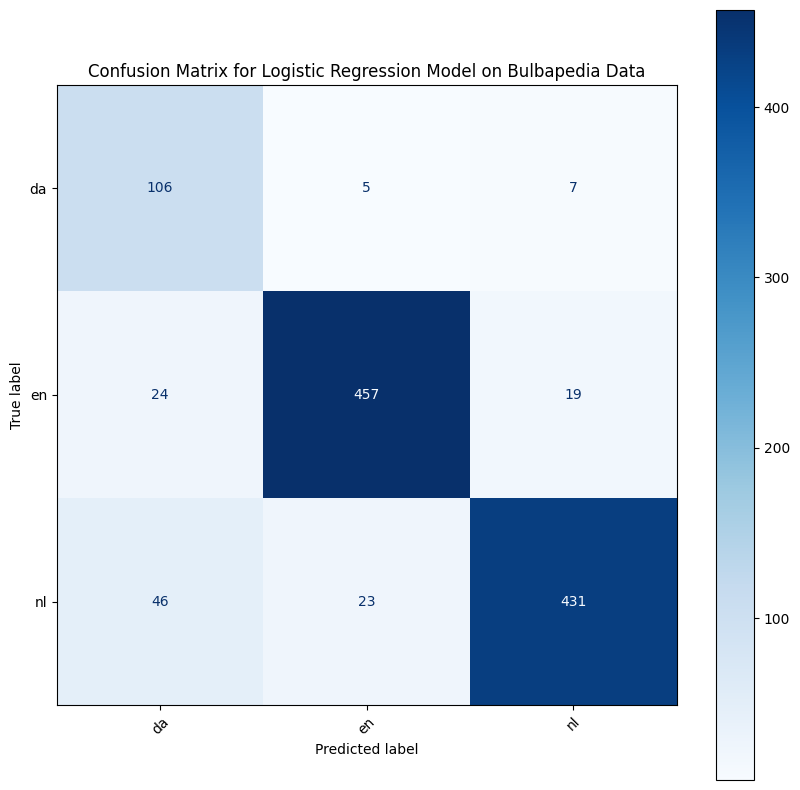

In [22]:
# Confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import numpy as np

# Generate predictions on the Bulbapedia development set
bulba_predictions = LR_model.predict(bulba_dev_text)

# Compute the confusion matrix
cm = confusion_matrix(bulba_dev_labels, bulba_predictions, labels=LR_model.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(LR_model, bulba_dev_text, bulba_dev_labels,
                      display_labels=LR_model.classes_,
                      cmap=plt.cm.Blues,
                      normalize=None,
                      ax=ax)
plt.title('Confusion Matrix for Logistic Regression Model on Bulbapedia Data')
plt.xticks(rotation=45)
plt.show()

The confusion matrix provided for the Logistic Regression model on Bulbapedia data shows the following trends:

1. **High True Positives for English (en) and Dutch (nl):** The model correctly identifies a large number of English and Dutch samples, as indicated by the high numbers in the diagonal for 'en' and 'nl' classes.

2. **Misclassification of Danish (da) as English (en):** A significant number of Danish samples are misclassified as English. This could be due to the similarity between some Danish and English words, or it may suggest that the model has learned patterns that are common in English but also appear in Danish.

3. **Some English (en) Misclassified as Dutch (nl) and vice versa:** There are instances where English texts are misclassified as Dutch and Dutch texts as English. This might be because these languages share a lot of vocabulary and grammatical features, leading to confusion.

4. **Least Misclassification for Dutch (nl):** Dutch has the least number of texts misclassified as other languages, which might imply that the Dutch language features are more distinct compared to English and Danish in this dataset, or the model has learned to recognize Dutch more accurately.

5. **Misclassification of Danish (da) as Dutch (nl) and vice versa:** There are a few instances of Danish being classified as Dutch and Dutch as Danish. This suggests that there are some similarities between the two languages that the model is picking up on, which could be due to shared Germanic roots.

In [23]:
from sklearn.metrics import classification_report

# Generate the classification report, which includes precision, recall, and F1 score for each class
report = classification_report(bulba_dev_labels, bulba_predictions, target_names=LR_model.classes_)

print(report)

              precision    recall  f1-score   support

          da       0.60      0.90      0.72       118
          en       0.94      0.91      0.93       500
          nl       0.94      0.86      0.90       500

    accuracy                           0.89      1118
   macro avg       0.83      0.89      0.85      1118
weighted avg       0.91      0.89      0.89      1118



The classification report provides several important metrics for each language:

- **Precision**: Indicates how many of the items identified by the model as belonging to a certain class actually belong to that class.
- **Recall**: Indicates how many items of a certain class were correctly identified by the model out of all actual members of that class in the dataset.
- **F1-Score**: Combines precision and recall into a single metric by taking their harmonic mean. It's especially useful when the class distribution is unbalanced.
- **Support**: The number of actual occurrences of the class in the dataset.

Here's the interpretation of the results:

- **Danish (da)**: 
  - Precision is relatively low at 0.60, indicating that when the model predicts an item is in Danish, it is correct 60% of the time.
  - Recall is high at 0.90, meaning the model successfully identifies 90% of all Danish items in the dataset.
  - The F1-score, which balances precision and recall, is 0.72, suggesting that while the model is quite good at detecting Danish, when it does, it is less reliable than for English and Dutch.
  - The support of 118 indicates a smaller number of Danish samples compared to English and Dutch.

- **English (en)**:
  - Precision is high at 0.94, suggesting a high level of reliability in the model's English predictions.
  - Recall is also high at 0.91, meaning the model identifies 91% of all English items correctly.
  - The F1-score is 0.93, which is the highest of the three languages, indicating the best overall balance of precision and recall for English.
  - English has the highest support with 500, meaning it has more samples in the dataset, which typically helps in training more reliable classifiers.

- **Dutch (nl)**:
  - Precision is high at 0.94, on par with English.
  - Recall is somewhat lower at 0.86, indicating that while the model's predictions are reliable, it misses more Dutch items than it does English items.
  - The F1-score is 0.90, which is slightly lower than English but still indicates a strong performance.
  - Dutch also has a high support value of 500, which means a large number of samples for this class as well.

- **Overall Accuracy**: 
  - The model has an overall accuracy of 0.89, which means that it correctly identifies the language 89% of the time across all predictions.

- **Macro Average**: 
  - The macro average treats all classes equally, averaging the metric scores without taking the support into account. The macro avg F1-score is 0.85, which is a strong performance but slightly lower than the weighted average.

- **Weighted Average**: 
  - The weighted average takes the support into account, giving more weight to classes with more samples. The weighted avg F1-score is 0.89, which is closer to the overall accuracy and reflects the influence of the more numerous English and Dutch samples.

In summary, English has the best F1-score and thus the best performance according to this metric, followed closely by Dutch. Danish has the lowest F1-score, which is significantly affected by its lower precision.

### Feature weights
In scikit-learn, you can inspect the internal weights given to each feature in the `.coef_` variable. 

b) Inspect the most important features for both the naive bayes and logistic regression classifiers. Are there any interesting differences?

**Hint**: The weights are given per class, so you can either inspect three lists, or compute the average importance
(make sure to use the absolute feature values for the average).

Top features for both models according to the average importance of their weights across all classes. [::-1] reverses the indices to sort from highest to lowest. Get top 10 features to retrieve with [:10].

For Naive Bayes, the `.feature_log_prob_` gives the log probability of each feature given a class, while for Logistic Regression, `.coef_ gives` the actual weights that multiply the feature values to get the decision function. High absolute values of weights in Logistic Regression imply greater importance in the classification decision, while for Naive Bayes, higher log probabilities indicate a stronger relationship with the class.

In [24]:
import numpy as np

# For Logistic Regression
# Get feature names from the vectorizer
feature_names = LR_model.named_steps['countvectorizer'].get_feature_names_out()

# Get the coefficients from the Logistic Regression model
lr_coefs = LR_model.named_steps['logisticregression'].coef_

# Get the absolute values of the coefficients for each class and then average them
lr_avg_coefs = np.mean(np.abs(lr_coefs), axis=0)

# Get the indices of the sorted averaged coefficients
lr_sorted_indices = np.argsort(lr_avg_coefs)[::-1]

# Get the top features for Logistic Regression
top_lr_features = feature_names[lr_sorted_indices[:10]]  # change 10 to desired number of top features

# For Naive Bayes
# Get the log probabilities of features for each class
nb_log_prob = NB_model.named_steps['multinomialnb'].feature_log_prob_

# Get the absolute values of the log probabilities and then average them
nb_avg_log_prob = np.mean(np.abs(nb_log_prob), axis=0)

# Get the indices of the sorted averaged log probabilities
nb_sorted_indices = np.argsort(nb_avg_log_prob)[::-1]

# Get the top features for Naive Bayes
top_nb_features = feature_names[nb_sorted_indices[:10]]  # change 10 to desired number of top features

# Compare the top features
print("Top features for Logistic Regression:")
print(top_lr_features)
print("\nTop features for Naive Bayes:")
print(top_nb_features)


Top features for Logistic Regression:
['[ 2' '200' 'maj' 'tap' '[ 1' 'ed ' 'de ' 'maj ' 'aan' 'gar']

Top features for Naive Bayes:
[' s-0d3' 't om u' 't opwa' 'ku te' 'ku te ' 'ku van' 'ku ve' 'ku ver'
 'ku vo' 'ku voz']


N-gram character features from text.

**Logistic Regression Features:**
- The n-grams like `'de '` (likely the beginning of Dutch definite articles or prepositions), `'ed '` (possibly the end of a past-tense verb in English), and `'aan'` (Dutch for "on" or part of a verb) suggest that the Logistic Regression model is picking up on common substrings that may be indicative of the language's grammar and common words.
- The n-grams `'maj'` and `'gar'` could be parts of words that are distinctive to certain languages within the dataset. For instance, `'maj'` could be part of a word like "majestic" in English or "majestæt" in Danish, and `'gar'` might be from "garçon" in English borrowed from French or "garage" in Dutch.
- N-grams such as `'[ 2'` and `'[ 1'` might be artifacts from the dataset.

**Naive Bayes Features:**
- The Naive Bayes features like `'ku te'`, `'ku van'`, `'ku ver'`, and `'ku vo'` seem to be part of larger words or sequences that may be very common in one of the languages. It's not immediately clear what language these could belong to without additional context.
- Sequences such as `'t om u'` and `'t opwa'` might be more indicative of Dutch, as the `'t` could be the article "het" abbreviated and common verb prefixes like "om" (around) and "opwa" (upward).

**Interpretation Differences:**
- The features important to the Logistic Regression model seem to include both language-specific character sequences and possible formatting or numbering from the data, suggesting that it might be leveraging both linguistic and structural cues from the text.
- The Naive Bayes features are less immediately interpretable and seem to focus on more unique sequences that might be highly indicative of the language but are less obviously connected to language structure.

The differences in the features may indicate differences in the strategies the two models use to classify text: Logistic Regression might be picking up on more general patterns that apply across multiple instances, while Naive Bayes may be capturing more specific cues that are highly predictive of certain classes. This could be due to the intrinsic differences in how these models learn from the data.